In this notebook we will practice linear regression models with one and multiple variables. We will use the step-by-step Supervised Machine Learning plan that we have learned during the first module in Supervised Machine Learning. Previously, we encountered a classification problem: identfying good and bad quality based on wine characteristics. Now, we are going to look at predicting sales on the basis of investment in different marketing channels: TV, Social media and the Newspaper.


As usual, we start with the import of the libraries that we need during for modelling.

In [17]:
# import the numpy and pandas package
import numpy as np
import pandas as pd

# data visualisation libaries
import matplotlib.pyplot as plt 
import matplotlib as mpl 
import seaborn as sns
from matplotlib.gridspec import GridSpec

# linear modelling libaries
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# warning ignore
import warnings
warnings.filterwarnings('ignore')

# set figure size 
mpl.rcParams['figure.figsize'] = (18,8)

# checking and plot functions
from dsiad_functions import Solution_SMLreg
from dsiad_functions import plots
solution = Solution_SMLreg()
plot = plots()   

Solutions loaded...



# STEP 3: Data collection
First, we need to "collect" our data. Usually, this is a time intensive process. Luckily, we provided you with a prepared dataset. We will read in the dataset by the function `pd.read_csv()`.

In [8]:
data = pd.read_csv('advertising.csv')

# STEP 4: Data exploration
Let's look through our data with `.head()` to see what we are dealing with. We see 4 columns, the unit of the columns is euro's.

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,442.0
1,44.5,39.3,45.1,208.0
2,17.2,45.9,69.3,240.0
3,151.5,41.3,58.5,330.0
4,180.8,10.8,58.4,358.0


Let's look through the distribution of the data with `.describe()`. Remember to pay attention to the mean, minimum and maximum of the different columns.

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,302.610000
std,85.854236,14.846809,21.778621,105.677845
min,0.700000,0.000000,0.300000,32.000000
25%,74.375000,9.975000,12.750000,220.000000
50%,149.750000,22.900000,25.750000,320.000000
75%,218.825000,36.525000,45.100000,381.000000
max,296.400000,49.600000,114.000000,540.000000


We have learned that it is important to check for missing values, because python models are not able to process these. We use `.isnull().sum()` to let us look through the count of missing values per column.

TV             0
Socialmedia    0
Newspaper      0
Sales          0
dtype: int64

Now it is time for some visuals! We are interested in sales, let's see how sales and the different media channels vary with `sns.pairplot()`. `Sales` is the diplayed at the y-axis (`y_vars`) and the channels at the 3 x-axes (`x-vars`).

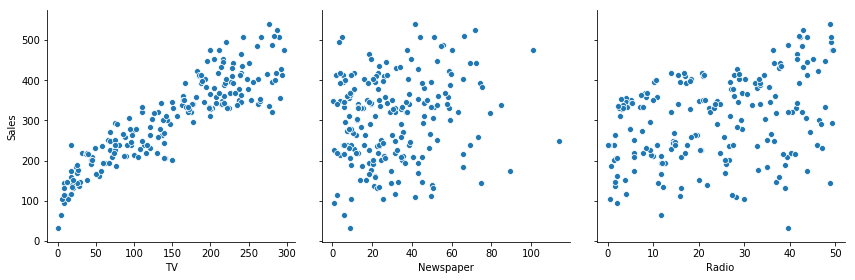

In [5]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Socialmedia'], y_vars='Sales', height=4, aspect=1, kind='scatter')

The heatmap shows the strength of the correlation between sales and the media channels. `data.corr()` calculates the correlation matrix. `sns.heatmap()` displays the correlation matrix as a coloured map. `annot = True` allows us to see the actual values, e.g. the correlation between `TV` and `Sales` is 0.9. Write down the heatmap function and run to see the plot! Run the cell below to show the solution. 

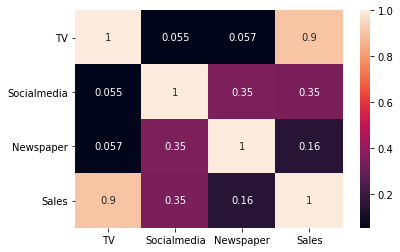

In [4]:
solution.step_4()

sns.heatmap(data.corr(), annot = True)


So what can we learn from the heatmap? First of all, we can see that there is low correlation between our potential features (the marketing channels). We see that there is a strong correlation between Sales and TV. Interesting! Investment in TV ads seem to be a good predictor for sales. The correlation is positive. TV investment are likely to lead to an increase in sales.

# STEP 5-6: Feature engineering and feature selection

We skip the feature engineering and selection for now, as we have practiced this earlier. We provided you with a ready to go dataset, so we can focus on the modelling! 

# STEP 7: Modelling
## 7.1 Single variable linear regression

In the heatmap we noticed a strong correlation between `TV` and `Sales`. It seems like TV is a promising investment to grow our sales. By training a single variable linear regression we can find out by how much. We will look for the coefficient, i.e. how much sales increases if we invest 1 euro in TV ads. Moreover, we will look for the intercept, which represents the bottomline of our sales. This is not affected by the TV investments.

First we need to set our target `Sales` and feature `TV`. The model we will apply requires a certain shape of the data, therefore we use `values.reshape()`.

In [7]:
#target/feature setting
X = data["TV"].values.reshape(-1,1)
y = data["Sales"].values.reshape(-1,1)

We split our dataset in test and train data. 20% of the data (`test_size = 0.2`) is going to our test set. `random_state = 42` is an argument that allows us to reproduce our result. 

In [8]:
#test train split
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size = 0.2, 
    random_state = 42
)

Time for training the model! As explained, we are looking for the values of 2 parameters: the intercept and the coefficient for `TV`. Our model `LinearRegression()` will look for the parameters that best fit the data. We tell python to look for the parameters by calling `.fit()`. In the last statement, we ask to display the intercept and coefficient.

In [9]:
# Fit the resgression line
reg = LinearRegression()
reg.fit(X_train, y_train)

#printing intercept and coefficient
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

The linear model is: Y = 140.14 + 1.1097X


So what does this mean in practice? Run the next cell to see! 

In [10]:
print("If we do not invest in TV advertiment, our Sales would be: ", round(reg.intercept_[0],2), "euro")
print("For every euro invested in TV adds, our sales increases by", round(reg.coef_[0][0],2), "euro")

If we do not invest in TV advertiment, our Sales would be:  140.14 euro
For every euro invested in TV adds, our sales increases by 1.11 euro


Next, we are going to make predictions on our test data set with `.predict()`

In [11]:
predictions = reg.predict(X_test)

Let's visualize the regression line together with the data. We use a scatter plot `plt.scatter()` to display our testset `X_test` and `y_test`. We use a lineplot `.plt.plot()` to show our model, based on the `predictions`.

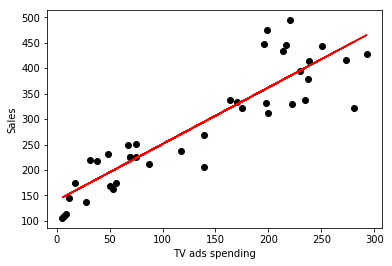

In [12]:
#plotting prediction line + test data
predictions = pd.DataFrame(predictions)
X_test = pd.DataFrame(X_test)
y_test = pd.DataFrame(y_test)


plt.scatter(X_test, y_test, c="black")
plt.plot(X_test, predictions, c="red")
plt.xlabel("TV ads spending")
plt.ylabel("Sales")
plt.show()

## 7.2 Multivariate linear regression

Currently, we have only looked at the relationship between `Sales` and `TV`. However, we can also take `Socialmedia` and `Newpaper` into account and see how these channels effect sales. Let's take Sales as our target `y` and the channels `TV`, `Socialmedia` and `Newspaper` as our features `X`.

In [11]:
#target/feature setting
X = data.drop("Sales", axis=1)
y = data["Sales"].values.reshape(-1,1)

Now it is your turn! Repeat the step of 7.1 for the multivariate linear regression! If it becomes difficult, you can run the last cell of this paragraph to view the solution. 

In [12]:
## ADD YOUR CODE HERE ##

In [13]:
# Fit the resgression line 
multi_reg = # Fit the resgression line

#display intercept and coefficients
print("The linear model is: Y = {:.5} + {:.5}X_1 + {:.5}X_2 + {:.5}X_3 ".format(multi_reg.intercept_[0], multi_reg.coef_[0][0], multi_reg.coef_[0][1], multi_reg.coef_[0][2]))

The linear model is: Y = 94.283 + 1.0902X_1 + 2.0189X_2 + 0.086733X_3 


 Run the next cell to see what assumptions our model is making! 

In [15]:
print("If we do not invest in advertiment, our Sales would be: ", round(multi_reg.intercept_[0], 2))
print("For every euro invested in TV adds, our sales increases by: ", round(multi_reg.coef_[0][0],2), "euro")
print("For every euro invested in Social media adds, our sales increases by: ", round(multi_reg.coef_[0][1],2), "euro")
print("For every euro invested in Newspaper adds, our sales increases by: ", round(multi_reg.coef_[0][2],2), "euro")

NameError: name 'multi_reg' is not defined

Finally, we let our model predict the Sales of our test dataset. 

In [256]:
## ADD YOUR CODE HERE ##

Here you can find the correct code: 

In [6]:
solution.step_7()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) multi_reg = LinearRegression() multi_reg.fit(X_train, y_train) predictions = reg.predict(X_test)


# STEP 8: Evaluation

To evaluate our models we are going to look at the residual plot and the $R^2$ score. The coefficient of determination, $R^2$ , is a statistical measure that shows the proportion of variation explained by the estimated regression line. If $R^2$ is one, all our data is captured by the model.  If $R^2$ is zero, none of our data is captured by the model. 

### Single variable linear regression

Let's see how our single variable model (effect of `TV` on `Sales`) is performing. The $R^2$ can be found in the plot's legend. 

The model fitted is LinearRegression()


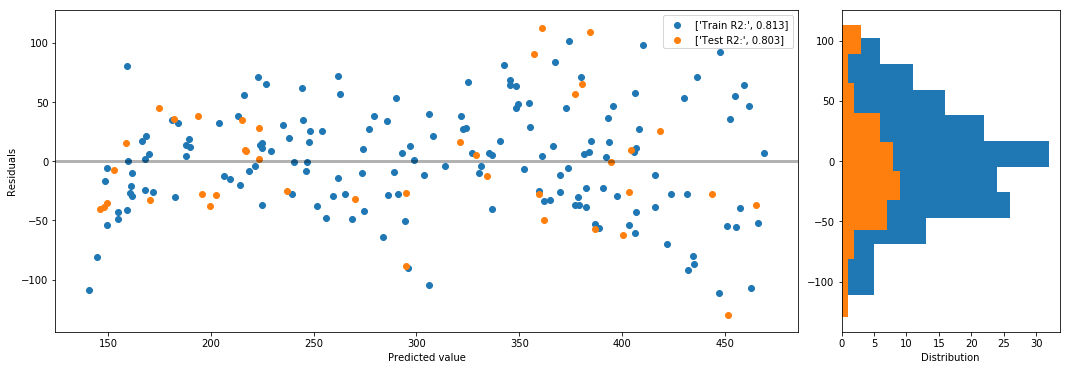

In [10]:
X = data["TV"].values.reshape(-1,1)
y = data["Sales"].values.reshape(-1,1)

plot.residual_plot(X,y)

### Multivariate linear regression

Now the we will look at the residual plot of our multivariate model. We included the effect of `TV`, `Socialmedia` and `Newspaper` on sales here.

The model fitted is LinearRegression()


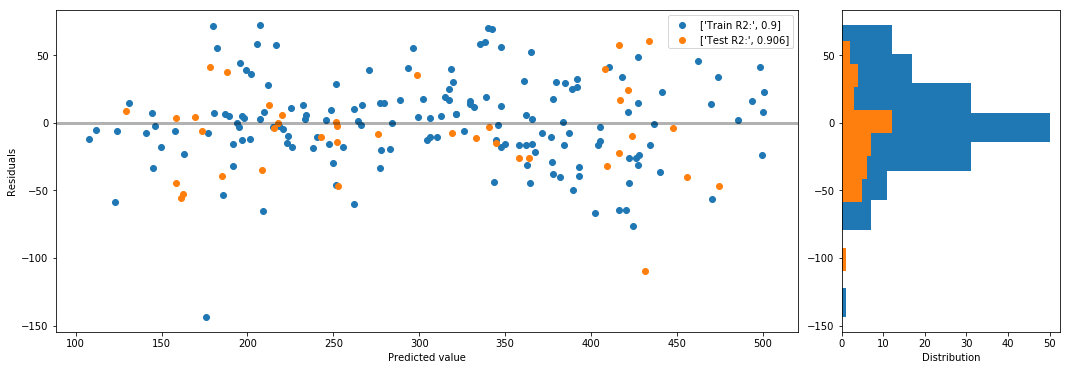

In [9]:
X = data.drop("Sales", axis=1)
y = data["Sales"].values.reshape(-1,1)

plot.residual_plot(X,y)

Based on the $R^2$ score, our multivariate model is outperforming the single variable model. We can see that the rediduals are more densily populated around the x-axis. 

# STEP 9: Predicting sales

Run the cell below, to review the conclusions of our selected model. 

In [259]:
print("If we do not invest in advertiment, our Sales would be: ", round(multi_reg.intercept_[0], 2))
print("For every euro invested in TV adds, our sales increases by: ", round(multi_reg.coef_[0][0],2), "euro")
print("For every euro invested in Socialmedia adds, our sales increases by: ", round(multi_reg.coef_[0][1],2), "euro")
print("For every euro invested in Newspaper adds, our sales increases by: ", round(multi_reg.coef_[0][2],2), "euro")

If we do not invest in advertiment, our Sales would be:  94.28
For every euro invested in TV adds, our sales increases by:  1.09 euro
For every euro invested in Radio adds, our sales increases by:  2.02 euro
For every euro invested in Newspaper adds, our sales increases by:  0.09 euro


You decided to invest 20.000 in Newspaper, 50.000 in Social Media and 100.000 in TV. Write down code that estimates the sales based on our model. 

In [18]:
#investments
X_1 = #TV
X_2 = #Social media
X_3 = #Newspaper

sales = ## WRITE DOWN YOUR CODE HERE ## 

print(sales)
solution.check9(sales)

211793.943
Not quite yet, try again!


In [20]:
solution.step_9()

X_1 = 100000 X_2 = 50000 X_3 = 20000 sales = 94.283 + 1.0902*X_1 + 2.0189*X_2 + 0.086733*X_3
